In [24]:
pip install yfinance beautifulsoup4 pandas matplotlib


In [25]:
import yfinance as yf

# Descargar datos de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")  # Datos históricos completos
print(tesla_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL con datos financieros de Tesla
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
html_tesla = requests.get(url_tesla, headers=headers).text
soup_tesla = BeautifulSoup(html_tesla, "html.parser")

# Buscar la tabla por clase
table_tesla = soup_tesla.find("table", {"class": "historical_data_table table"})
if table_tesla:
    rows_tesla = table_tesla.find_all("tr")
    data_tesla = []
    for row in rows_tesla[1:]:
        cols = row.find_all("td")
        data_tesla.append([col.text.strip() for col in cols])

    tesla_revenue = pd.DataFrame(data_tesla, columns=["Date", "Revenue"])
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)
    tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
    print(tesla_revenue.head())
else:
    print("No se encontró la tabla de ingresos para Tesla.")


        Date  Revenue
0 2023-01-01  96773.0
1 2022-01-01  81462.0
2 2021-01-01  53823.0
3 2020-01-01  31536.0
4 2019-01-01  24578.0


In [27]:
# Descargar datos de GameStop
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")  # Datos históricos completos
gamestop_data.reset_index(inplace=True)  # Convertir índice a columna para manejo más fácil
print(gamestop_data.head())  # Mostrar las primeras filas


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [28]:
!pip install yfinance
import yfinance as yf
# Descargar datos de GameStop



In [29]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")  # Datos históricos completos
gamestop_data.reset_index(inplace=True)  # Convertir índice a columna para manejo más fácil
print(gamestop_data.head())  # Mostrar las primeras filas

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [30]:
# URL con datos financieros de GameStop
url_gamestop = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_gamestop = requests.get(url_gamestop, headers=headers).text
soup_gamestop = BeautifulSoup(html_gamestop, "html.parser")

# Buscar la tabla por clase
table_gamestop = soup_gamestop.find("table", {"class": "historical_data_table table"})
if table_gamestop:
    rows_gamestop = table_gamestop.find_all("tr")
else:
    rows_gamestop = []

# Procesar las filas
if not rows_gamestop:
    print("No se encontró la tabla de ingresos para GameStop.")
else:
    data_gamestop = []
    for row in rows_gamestop[1:]:
        cols = row.find_all("td")
        data_gamestop.append([col.text.strip() for col in cols])

    # Crear el DataFrame
    gamestop_revenue = pd.DataFrame(data_gamestop, columns=["Date", "Revenue"])
    gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)
    gamestop_revenue["Date"] = pd.to_datetime(gamestop_revenue["Date"])
    print(gamestop_revenue.head())


        Date  Revenue
0 2024-01-01   5273.0
1 2023-01-01   5927.0
2 2022-01-01   6011.0
3 2021-01-01   5090.0
4 2020-01-01   6466.0


In [31]:
print(tesla_data.columns)  # Verifica las columnas de tesla_data
print(tesla_revenue.columns)  # Verifica las columnas de tesla_revenue


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
Index(['Date', 'Revenue'], dtype='object')


In [32]:
print(tesla_data.head())
print(tesla_revenue.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  
        Date  Revenue
0 2023-01-01  96773.0
1 2022-01-01  81462.0
2 

In [33]:
tesla_data.reset_index(inplace=True)  # Convierte el índice en columna
print(tesla_data.columns)  # Verifica que "Date" exista


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [34]:
# Convertir la columna "Date" al formato de fecha
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
print(tesla_revenue.columns)  # Verifica que "Date" exista


Index(['Date', 'Revenue'], dtype='object')


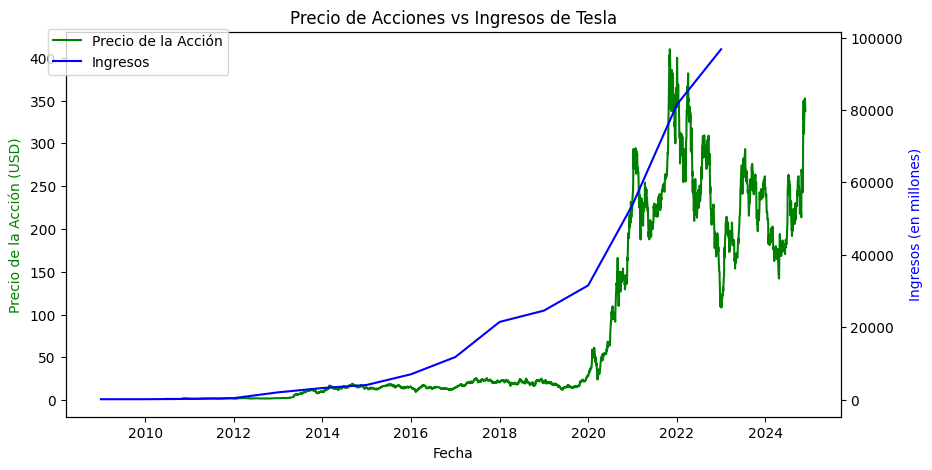

In [35]:
import matplotlib.pyplot as plt

# Crear gráfico de Tesla
fig, ax1 = plt.subplots(figsize=(10, 5))

# Gráfico de precios de las acciones
ax1.plot(tesla_data["Date"], tesla_data["Close"], "g-", label="Precio de la Acción")
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Precio de la Acción (USD)", color="g")

# Gráfico de ingresos
ax2 = ax1.twinx()
ax2.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], "b-", label="Ingresos")
ax2.set_ylabel("Ingresos (en millones)", color="b")

plt.title("Precio de Acciones vs Ingresos de Tesla")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()


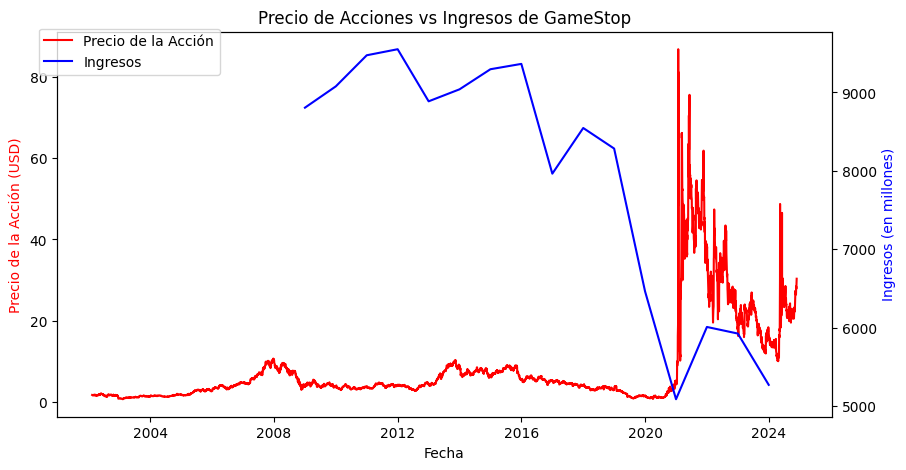

In [36]:
# Crear gráfico de GameStop
fig, ax1 = plt.subplots(figsize=(10, 5))

# Gráfico de precios de las acciones
ax1.plot(gamestop_data["Date"], gamestop_data["Close"], "r-", label="Precio de la Acción")
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Precio de la Acción (USD)", color="r")

# Gráfico de ingresos
ax2 = ax1.twinx()
ax2.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], "b-", label="Ingresos")
ax2.set_ylabel("Ingresos (en millones)", color="b")

plt.title("Precio de Acciones vs Ingresos de GameStop")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()
